### Compare the results of exercise 3b  combinations of  transformations to images. 15 epochs each and only 0.25 random subset selected from the train dataset.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
def plot_train_miou_composite(root_dir, nome_cartelle=['03_Geometric', '03_Weather', '1_Color'], comb_list=[1,2,3,4,5]):
    # Dizionari trasformazioni per categoria
    mapping_transforms = {
        'geometric': {
            'm': 'RandomCrop',
            'n': 'Affine',
            'o': 'Perspective'
        },
        'weather': {
            'f': 'RandomShadow',
            'g': 'RandomFog',
            'h': 'RandomRain',
            'i': 'ISONoise',
            'l': 'GaussianBlur'
        },
        'color': {
            'a': 'HueSaturationValue',
            'b': 'CLAHE',
            'c': 'GaussNoise',
            'd': 'RGBShift',
            'e': 'RandomBrightnessContrast'
        }
    }

    for nome_cartella in nome_cartelle:
        nome_core = nome_cartella.split('_', 1)[1].lower()  # es. geometric, weather, color
        path_categoria = os.path.join(root_dir, nome_cartella)
        if not os.path.isdir(path_categoria):
            continue

        for i in comb_list:
            nome_comb = f"{i}_comb"
            path_comb = os.path.join(path_categoria, nome_comb)
            if not os.path.isdir(path_comb):
                continue

            plt.figure(figsize=(10, 6))
            plotted = False

            for file in os.listdir(path_comb):
                if not file.endswith('.csv'):
                    continue
                if nome_core not in file.lower():
                    continue

                pattern = rf"3b_GTA5_to_CITY_augmented_{nome_core}_(.*?)_25_percent\.csv"
                match = re.search(pattern, file, re.IGNORECASE)
                if not match:
                    continue

                lettere_trasformazioni = match.group(1).split('_')
                if len(lettere_trasformazioni) != i:
                    continue

                diz_transform = mapping_transforms.get(nome_core, {})
                trasformazioni_nomi = [diz_transform.get(l.lower(), l) for l in lettere_trasformazioni]

                file_path = os.path.join(path_comb, file)
                try:
                    df = pd.read_csv(file_path)
                except:
                    continue

                cols_lower = [c.lower() for c in df.columns]
                if 'train_miou' not in cols_lower or 'epoch' not in df.columns:
                    continue

                idx_train_miou = cols_lower.index('train_miou')
                y_col = df.columns[idx_train_miou]

                plt.plot(df['epoch'], df[y_col], marker='o', label=', '.join(trasformazioni_nomi))
                plotted = True

            if plotted:
                plt.title(f"{nome_cartella} - {nome_comb} - train_MIOU per trasformazioni")
                plt.xlabel('epoch')
                plt.ylabel('train_MIOU')
                plt.legend(title='Trasformazioni')
                plt.grid(True)
                plt.tight_layout()
                plt.show()


In [3]:
def plot_val_miou_composite(root_dir, nome_cartelle=['03_Geometric', '03_Weather', '1_Color'], comb_list=[1,2,3,4,5]):
    # Dizionari trasformazioni per categoria
    mapping_transforms = {
        'geometric': {
            'm': 'RandomCrop',
            'n': 'Affine',
            'o': 'Perspective'
        },
        'weather': {
            'f': 'RandomShadow',
            'g': 'RandomFog',
            'h': 'RandomRain',
            'i': 'ISONoise',
            'l': 'GaussianBlur'
        },
        'color': {
            'a': 'HueSaturationValue',
            'b': 'CLAHE',
            'c': 'GaussNoise',
            'd': 'RGBShift',
            'e': 'RandomBrightnessContrast'
        }
    }

    for nome_cartella in nome_cartelle:
        nome_core = nome_cartella.split('_', 1)[1].lower()  # es geometric, weather, color
        path_categoria = os.path.join(root_dir, nome_cartella)
        if not os.path.isdir(path_categoria):
            continue

        for i in comb_list:
            nome_comb = f"{i}_comb"
            path_comb = os.path.join(path_categoria, nome_comb)
            if not os.path.isdir(path_comb):
                continue

            plt.figure(figsize=(10, 6))
            plotted = False

            for file in os.listdir(path_comb):
                if not file.endswith('.csv'):
                    continue
                if nome_core not in file.lower():
                    continue

                pattern = rf"3b_GTA5_to_CITY_augmented_{nome_core}_(.*?)_25_percent\.csv"
                match = re.search(pattern, file, re.IGNORECASE)
                if not match:
                    continue

                lettere_trasformazioni = match.group(1).split('_')
                if len(lettere_trasformazioni) != i:
                    continue

                # Traduci lettere in nomi trasformazioni, se manca usa la lettera stessa
                diz_transform = mapping_transforms.get(nome_core, {})
                trasformazioni_nomi = [diz_transform.get(l.lower(), l) for l in lettere_trasformazioni]

                file_path = os.path.join(path_comb, file)
                try:
                    df = pd.read_csv(file_path)
                except:
                    continue

                cols_lower = [c.lower() for c in df.columns]
                if 'val_miou' not in cols_lower or 'epoch' not in df.columns:
                    continue

                idx_val_miou = cols_lower.index('val_miou')
                y_col = df.columns[idx_val_miou]

                plt.plot(df['epoch'], df[y_col], marker='o', label=', '.join(trasformazioni_nomi))
                plotted = True

            if plotted:
                plt.title(f"{nome_cartella} - {nome_comb} - val_MIOU per trasformazioni")
                plt.xlabel('epoch')
                plt.ylabel('val_MIOU')
                plt.legend(title='Trasformazioni')
                plt.grid(True)
                plt.tight_layout()
                plt.show()


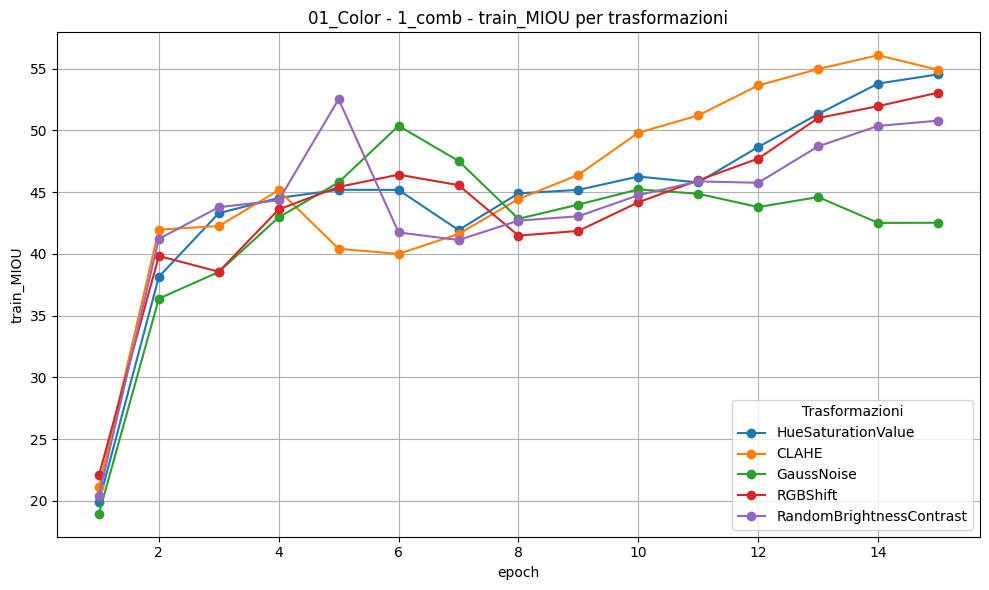

In [4]:
plot_train_miou_composite(root_dir='./1_Color', nome_cartelle=['01_Color'], comb_list=[1])

Clahe/HueSaturationValue best miou in last epochs
GaussNoise most stable but lower miou

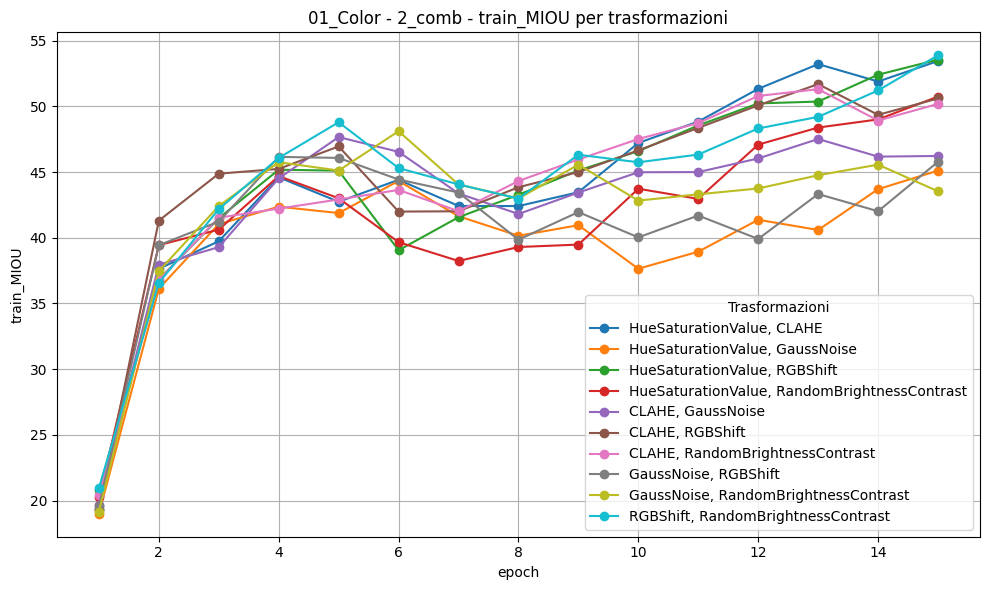

In [5]:
plot_train_miou_composite(root_dir='./1_Color', nome_cartelle=['01_Color'], comb_list=[2])

Clahe + HueSaturationValue : best miou in last epochs + pretty stable in last epochs (stays const)
HueSaturationValue + RGBShift : good miou in last epochs + pretty stable i last epochs (stays const)
RGBShift + RandomBrightnessContrast : good miou in last epochs, less stable (keeps increasing)

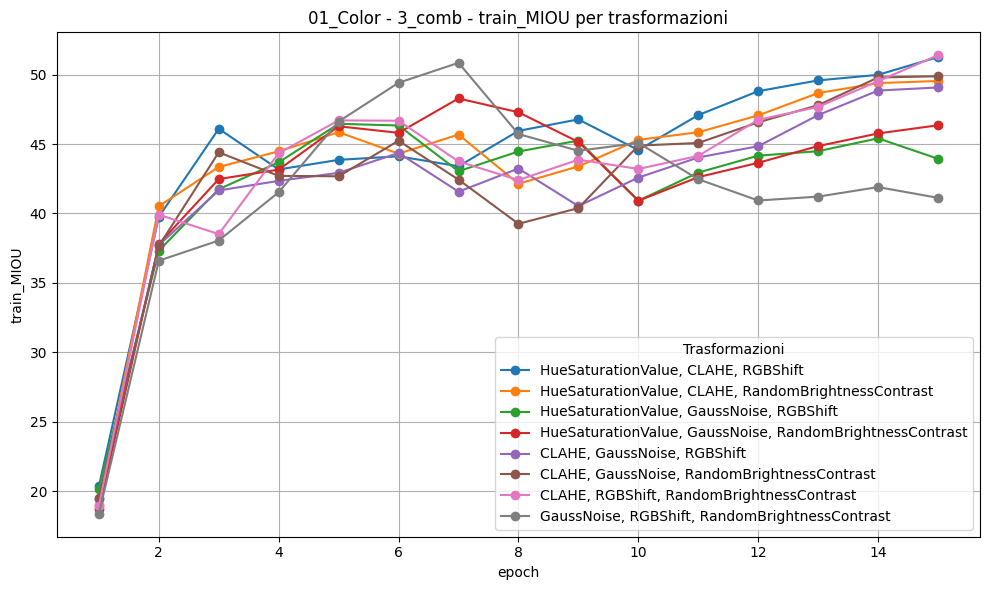

In [6]:
plot_train_miou_composite(root_dir='./1_Color', nome_cartelle=['01_Color'], comb_list=[3])

Clahe + HueSaturationValue + RGBShift : best miou in lash epochs and pretty stable
Clahe + RGBShift + RandomBrightnessContrast : best miou in last epochs, less stable (keeps increasing)
Clahe + HueSaturationValue + RandomBrightnessContrast : good miou in last epochs, less stable (keeps increasing)
Clahe + GaussNoise + RandomBrightnessContrast : good miou in last epochs, less stable (keeps increasing)


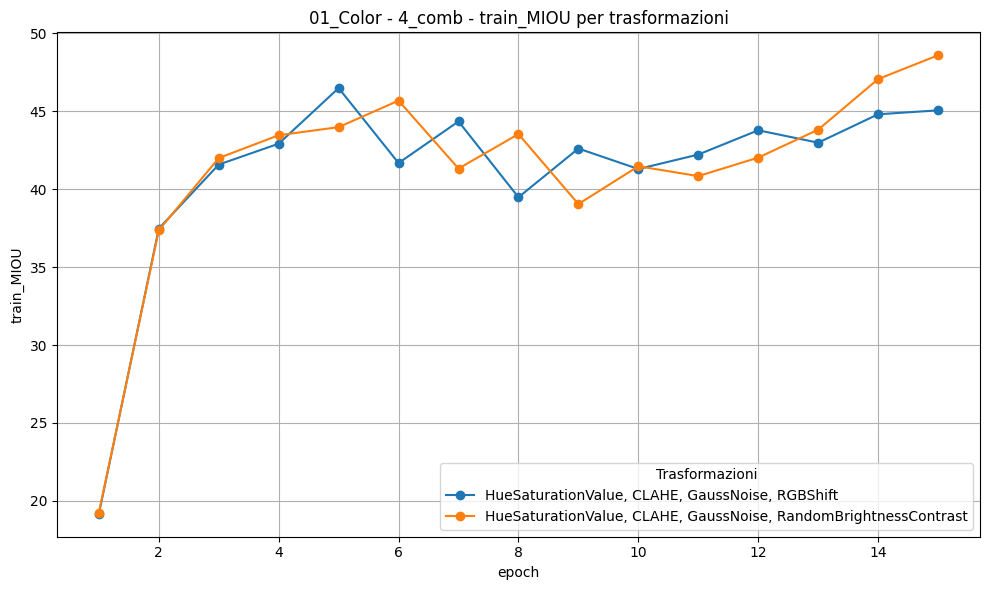

In [7]:
plot_train_miou_composite(root_dir='./1_Color', nome_cartelle=['01_Color'], comb_list=[4])

Clahe + HueSaturationValue + RGBShift + GaussNois: best miou in lash epochs but less stable (keeps increasing)


In [8]:
#plot_train_miou_composite(root_dir='.', nome_cartelle=['1_Color'], comb_list=[5])

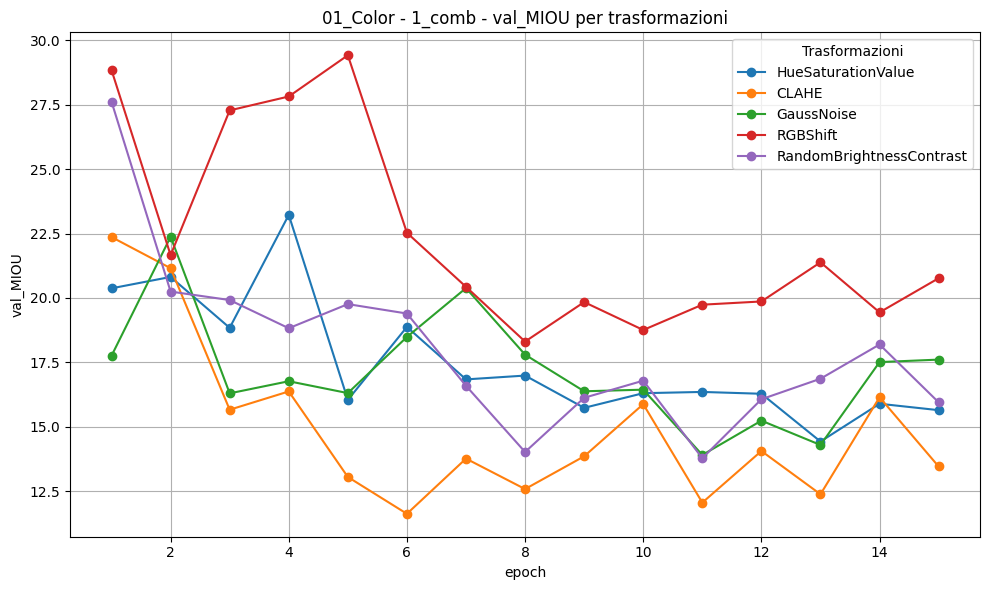

In [9]:
plot_val_miou_composite(root_dir="./1_Color", nome_cartelle=['01_Color'], comb_list=[1] )

RGBShift : best miou, stable

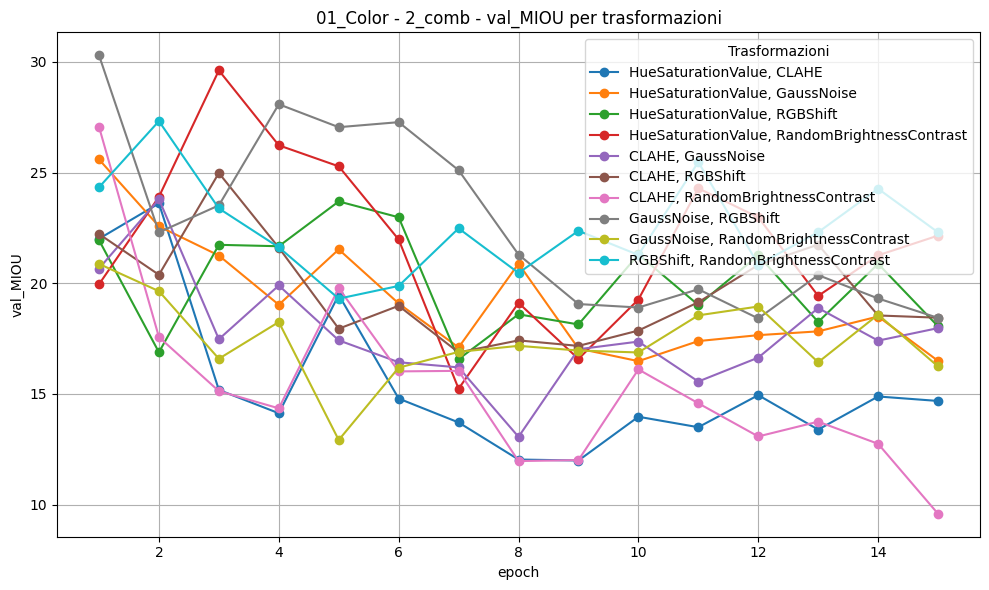

In [14]:
plot_val_miou_composite(root_dir="./1_Color", nome_cartelle=['01_Color'], comb_list=[2] )

RGBShift + RandomBrightnessContrast : best miou, pretty stable
HueSaturationValue + RandomBrightnessContrast : good miou at the end but unstable

while for trainig the best were
Clahe + HueSaturationValue : best miou in last epochs + pretty stable in last epochs (stays const)
HueSaturationValue + RGBShift : good miou in last epochs + pretty stable i last epochs (stays const)
RGBShift + RandomBrightnessContrast : good miou in last epochs, less stable (keeps increasing) ---> consider it

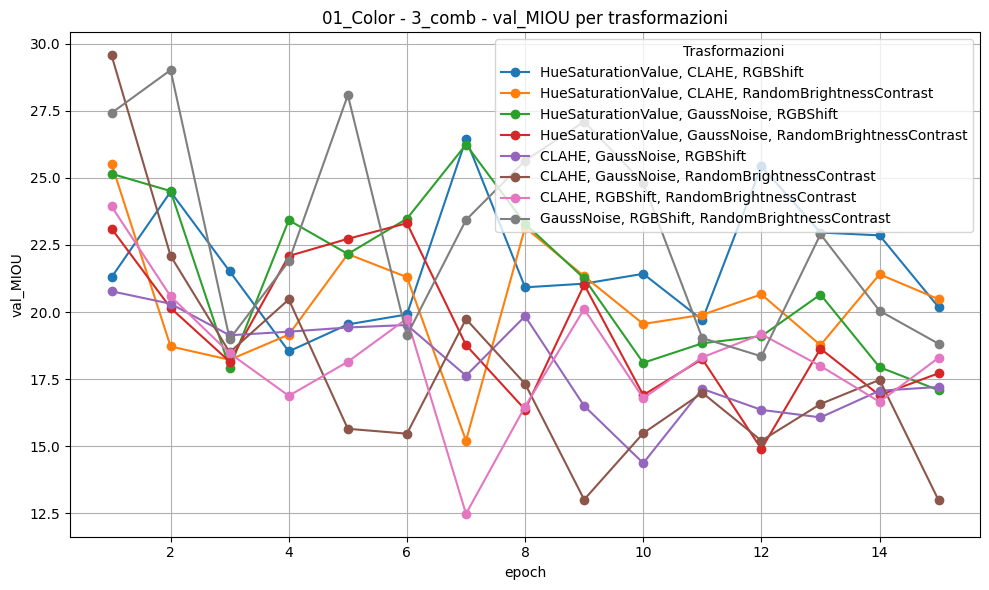

In [15]:
plot_val_miou_composite(root_dir="./1_Color", nome_cartelle=['01_Color'], comb_list=[3] )

HueSaturationValue + Clahe + RGBShift : best miou but unstable 
HueSaturationValue + Clahe + RandomBrightnessContrast : best miou but unstable
(maybe better to apply 2 trasnformations)
while for training the best were:
HueSaturationValue + Clahe + RGBShift : best miou in lash epochs and pretty stable ---> consider it
Clahe + RGBShift + RandomBrightnessContrast : best miou in last epochs, less stable (keeps increasing)
HueSaturationValue + Clahe + RandomBrightnessContrast : good miou in last epochs, less stable (keeps increasing) ---> consider it
Clahe + GaussNoise + RandomBrightnessContrast : good miou in last epochs, less stable (keeps increasing)

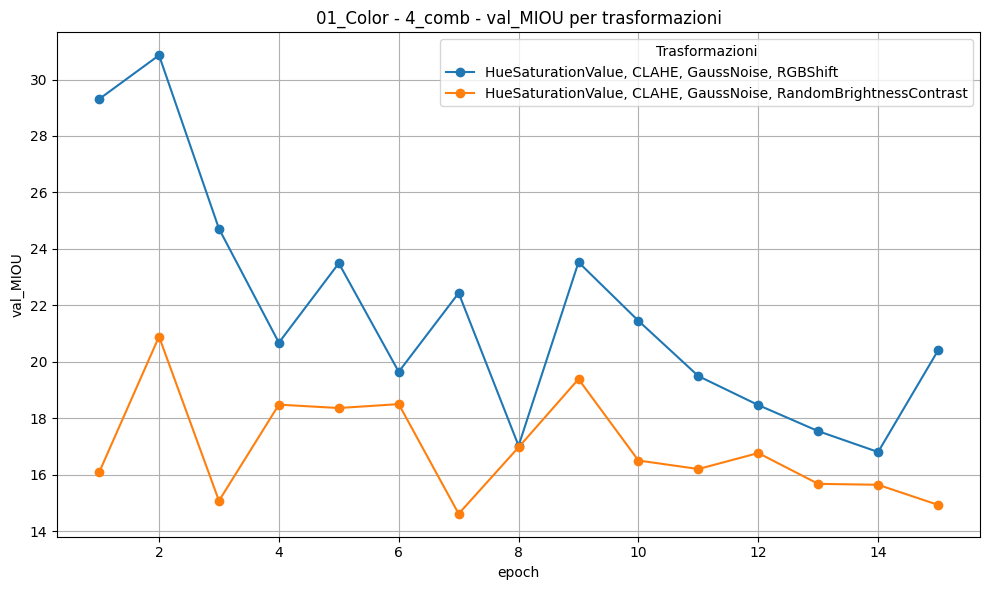

In [12]:
plot_val_miou_composite(root_dir="./1_Color", nome_cartelle=['01_Color'], comb_list=[4] )

4 mi sembra una cafonata...

In [13]:
#plot_val_miou_composite(root_dir="./1_Color", nome_cartelle=['01_Color'], comb_list=[5] )